# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress
import os

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
lat = []
lon = []
temp = []
hum = []
cloud = []
wind = []
country = []
date = []
city_name = []
counter = 0

# Loop through the list of cities and perform a request for data on each
print("Begining Data Retrieval ")
print("-----------------------------")
for city in cities:
    try:
        counter += 1
        print(f"Processing Record {counter} | {city}")
        
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        date.append(response['dt'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        city_name.append(city)
    except:
        print('City not found. Skipping...')
print(" ----------------------------- Data Retrieval Complete -----------------------------")



Begining Data Retrieval 
-----------------------------
Processing Record 1 | bethel
Processing Record 2 | hithadhoo
Processing Record 3 | ziway
Processing Record 4 | yellowknife
Processing Record 5 | muros
Processing Record 6 | bredasdorp
Processing Record 7 | atuona
Processing Record 8 | albany
Processing Record 9 | umba
Processing Record 10 | saint-francois
Processing Record 11 | tekeli
Processing Record 12 | tuktoyaktuk
Processing Record 13 | upernavik
Processing Record 14 | lavrentiya
Processing Record 15 | dawson creek
Processing Record 16 | male
Processing Record 17 | aklavik
Processing Record 18 | adrar
Processing Record 19 | hermanus
Processing Record 20 | khatanga
Processing Record 21 | pietersburg
Processing Record 22 | mataura
Processing Record 23 | puerto ayora
Processing Record 24 | buqayq
City not found. Skipping...
Processing Record 25 | arraial do cabo
Processing Record 26 | emerald
Processing Record 27 | tecoanapa
Processing Record 28 | ushuaia
Processing Record 29 | m

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weatherDF = pd.DataFrame({"City": city_name,"lat": lat, "long": lon, "Max Temp °C": temp,
                          "Humidity %": hum,"Cloudiness %": cloud,"Wind Speed": wind,
                          "Country":country, "Date": date,})

In [5]:
weatherDF

,City,lat,long,Max Temp °C,Humidity %,Cloudiness %,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,17.19,81,0,1.54,US,1663385929
1,hithadhoo,-0.6000,73.0833,27.57,73,78,2.68,MV,1663385929
2,ziway,7.9333,38.7167,16.54,81,30,3.19,ET,1663385929
3,yellowknife,62.4560,-114.3525,10.31,87,40,3.60,CA,1663385929
4,muros,42.7762,-9.0603,17.31,82,100,3.54,ES,1663385930
...,...,...,...,...,...,...,...,...,...
575,beloha,-25.1667,45.0500,20.92,58,0,2.98,MG,1663386070
576,havoysund,70.9963,24.6622,8.13,91,100,11.92,NO,1663386070
577,marseille,43.3333,5.5000,15.47,58,32,4.47,FR,1663385959
578,ushtobe,45.2514,77.9838,14.90,27,37,6.07,KZ,1663386071


In [6]:
weatherDF.describe()

,lat,long,Max Temp °C,Humidity %,Cloudiness %,Wind Speed,Date
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,5.800000e+02
mean,20.626336,14.336429,18.588052,71.951724,56.622414,3.807138,1.663386e+09
std,33.183500,90.988955,8.396069,20.044193,39.897717,2.699884,7.918239e+01
min,-54.800000,-179.166700,-3.400000,1.000000,0.000000,0.000000,1.663385e+09
25%,-5.721850,-66.056675,11.722500,61.000000,14.750000,1.890000,1.663386e+09
50%,23.944200,17.281450,18.970000,77.000000,70.500000,3.195000,1.663386e+09
75%,48.470425,91.453200,25.972500,88.000000,99.000000,5.002500,1.663386e+09
max,78.218600,179.316700,36.580000,100.000000,100.000000,15.990000,1.663386e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#I used the .drop method in Pandas which achives a similar result
weatherDF_clean = weatherDF.drop(weatherDF[weatherDF['Humidity %'] == 100].index, inplace=False)

## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

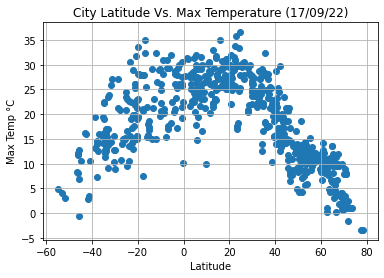

In [8]:
x_values = weatherDF_clean['lat']
y_values = weatherDF_clean['Max Temp °C']
plt.scatter(x_values,y_values)
plt.ylabel('Max Temp °C')
plt.xlabel('Latitude')
plt.title('City Latitude Vs. Max Temperature (17/09/22)')
plt.grid()
plt.savefig('output_data/lat_v_temp.png', dpi=100)
plt.show()

## Latitude vs. Humidity Plot

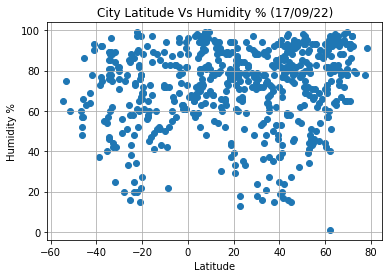

In [9]:
x_values = weatherDF_clean['lat']
y_values = weatherDF_clean['Humidity %']
plt.scatter(x_values,y_values)
plt.ylabel('Humidity %')
plt.xlabel('Latitude')
plt.title('City Latitude Vs Humidity % (17/09/22)')
plt.grid()
plt.savefig('output_data/lat_v_humidity.png', dpi=100)
plt.show()

## Latitude vs. Cloudiness Plot

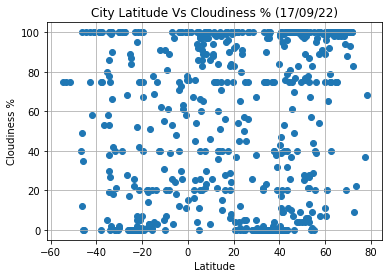

In [10]:
x_values = weatherDF_clean['lat']
y_values = weatherDF_clean['Cloudiness %']
plt.scatter(x_values,y_values)
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')
plt.title('City Latitude Vs Cloudiness % (17/09/22)')
plt.grid()
plt.savefig('output_data/lat_v_humidity.png', dpi=100)
plt.show()

## Latitude vs. Wind Speed Plot

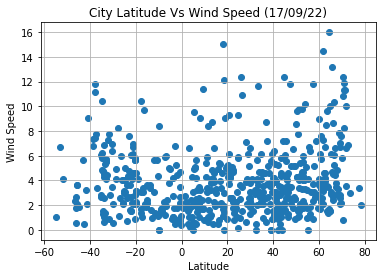

In [11]:
x_values = weatherDF_clean['lat']
y_values = weatherDF_clean['Wind Speed']
plt.scatter(x_values,y_values)
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.title('City Latitude Vs Wind Speed (17/09/22)')
plt.grid()
plt.savefig('output_data/lat_v_wind.png', dpi=100)
plt.show()

## Linear Regression

In [27]:
weatherDF_nth = weatherDF_clean[weatherDF_clean['lat'] >= 0]
weatherDF_sth = weatherDF_clean[weatherDF_clean['lat'] < 0]
weatherDF_nth.describe()

,lat,long,Max Temp °C,Humidity %,Cloudiness %,Wind Speed,Date
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,4.070000e+02
mean,38.078130,11.073163,18.408919,73.366093,60.538084,3.882801,1.663386e+09
std,20.315082,87.937902,8.857354,19.840028,39.869157,2.822919,6.332653e+01
min,0.533300,-179.166700,-3.400000,1.000000,0.000000,0.000000,1.663385e+09
25%,20.691800,-70.066350,10.960000,64.500000,20.000000,1.950000,1.663386e+09
50%,40.162900,16.119400,19.300000,79.000000,75.000000,3.260000,1.663386e+09
75%,54.155500,82.158350,26.115000,89.000000,100.000000,4.960000,1.663386e+09
max,78.218600,179.316700,36.580000,99.000000,100.000000,15.990000,1.663386e+09


###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

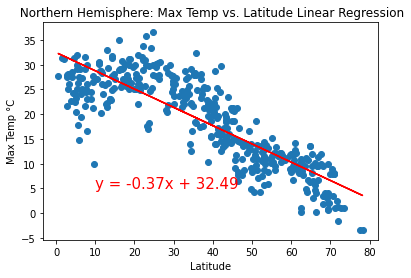

The r-squared is: 0.7188611917019914


In [13]:
x_values = weatherDF_nth['lat']
y_values = weatherDF_nth['Max Temp °C']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(10,5),fontsize=15,color="red")
plt.ylabel('Max Temp °C')
plt.xlabel('Latitude')
plt.title(' Northern Hemisphere: Max Temp vs. Latitude Linear Regression')
plt.savefig('output_data/nth_lat_v_temp.png', dpi=100)
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

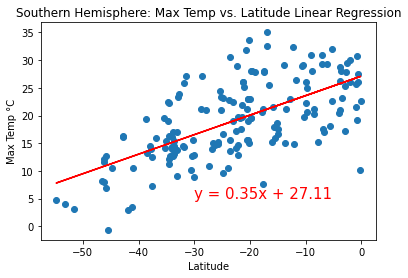

The r-squared is: 0.4152981890430474


In [14]:
x_values = weatherDF_sth['lat']
y_values = weatherDF_sth['Max Temp °C']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(-30,5),fontsize=15,color="red")
plt.ylabel('Max Temp °C')
plt.xlabel('Latitude')
plt.title('Southern Hemisphere: Max Temp vs. Latitude Linear Regression')
plt.savefig('output_data/sth_lat_v_temp.png', dpi=100)
plt.show()
print(f"The r-squared is: {rvalue**2}")

### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

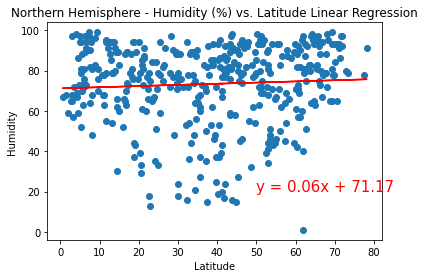

The r-squared is: 0.0034763076620726373


In [15]:
x_values = weatherDF_nth['lat']
y_values = weatherDF_nth['Humidity %']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.savefig('output_data/nth_lat_v_humidity.png', dpi=100)
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

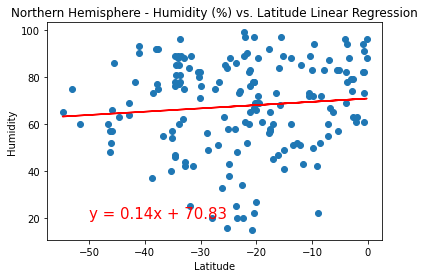

The r-squared is: 0.008601337766595434


In [23]:
x_values = weatherDF_sth['lat']
y_values = weatherDF_sth['Humidity %']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.savefig('output_data/sth_lat_v_humidity.png', dpi=100)
plt.show()
print(f"The r-squared is: {rvalue**2}")

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

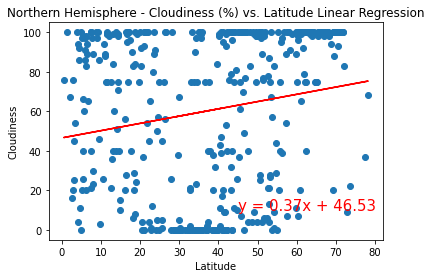

The r-squared is: 0.03511502416917702


In [17]:
x_values = weatherDF_nth['lat']
y_values = weatherDF_nth['Cloudiness %']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.savefig('output_data/nth_lat_v_cloud.png', dpi=100)
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

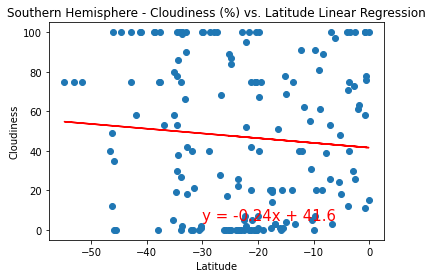

The r-squared is: 0.006822893068379755


In [18]:
x_values = weatherDF_sth['lat']
y_values = weatherDF_sth['Cloudiness %']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(-30,5),fontsize=15,color="red")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.savefig('output_data/sth_lat_v_cloud.png', dpi=100)
plt.show()
print(f"The r-squared is: {rvalue**2}")

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

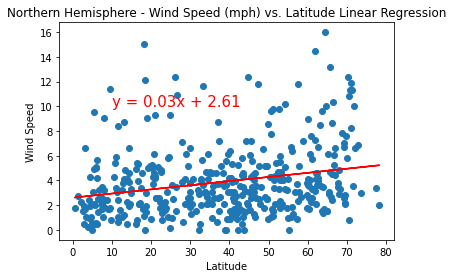

The r-squared is: 0.058173763901910806


In [19]:
x_values = weatherDF_nth['lat']
y_values = weatherDF_nth['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.savefig('output_data/nth_lat_v_wind.png', dpi=100)
plt.show()
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

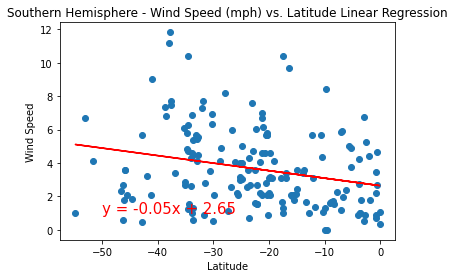

The r-squared is: 0.06088137792982248


In [24]:
x_values = weatherDF_sth['lat']
y_values = weatherDF_sth['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(-50,1),fontsize=15,color="red")
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.savefig('output_data/sth_lat_v_wind.png', dpi=100)
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [21]:
weatherDF_clean.to_csv('output_data/cities.csv', index=False)

## Observations

* The northern hemisphere has a possible correlation between latitude and temperature. There is an r-value of 0.7188611917019914 with a negative correlation. This is most likely due to increasing distance from the equator.

* The southern hemisphere has a possible correlation between latitude and temperature. There is an r-value of 0.4152981890430474 with a positive correlation. Although this is not as strong as the northern hemisphere this could be for two reasons. The first being a possible lack of data as my randomly generated cities definitely leaned toward the northern hemisphere (168 southern cities, 407 northern). There are also more cities in the southern hemisphere closer to the equator than the northern hemisphere.

* Another observation is that there is no correlation between the latitude and humidity, cloud cover and wind speed. With none of the r-values going above 0.0, which indicate a very low correlation between latitude and any of the three weather conditions.
